In [1]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

# GEO EM FILE

In [3]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'][0,:,:]

# time, LAT, LON ncfiles

In [4]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

# import FMAASO 400 data

In [5]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

# qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')

# pblh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PBLH' + filename_suffix)
# tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp_zcoords.nc')

# ph_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PH' + '_ens_mean_vinterp_zcoords.nc')
# phb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PHB' + '_ens_mean_vinterp_zcoords.nc')

u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')

#qvapor_ncfile.set_auto_mask(False)
#tk_ncfile.set_auto_mask(False)
#ph_ncfile.set_auto_mask(False)
#phb_ncfile.set_auto_mask(False)

#u_ncfile.set_auto_mask(False)
#v_ncfile.set_auto_mask(False)

In [12]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

z = u_ncfile.variables['z'][:]

u_400 = u_ncfile.variables['U'][:]
v_400 = v_ncfile.variables['V'][:]

# qvapor_400 = qvapor_ncfile.variables['QVAPOR'][:]
# tk_400 = tk_ncfile.variables['TK'][:]
# ph_400 = ph_ncfile.variables['PH'][:]
# phb_400 = phb_ncfile.variables['PHB'][:]

# pblh_400 = pblh_ncfile.variables['PBLH'][:]

# import FMAASO 1000 data

In [7]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')

# qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')

# pblh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PBLH' + filename_suffix)
# tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp_zcoords.nc')
# ph_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PH' + '_ens_mean_vinterp_zcoords.nc')
# phb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PHB' + '_ens_mean_vinterp_zcoords.nc')

# qvapor_ncfile.set_auto_mask(False)
# tk_ncfile.set_auto_mask(False)
# ph_ncfile.set_auto_mask(False)
# phb_ncfile.set_auto_mask(False)

In [13]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

#u_1000 = u_ncfile.variables['U'][:]
#v_1000 = v_ncfile.variables['V'][:]

# qvapor_1000 = qvapor_ncfile.variables['QVAPOR'][:]
# tk_1000 = tk_ncfile.variables['TK'][:]

# pblh_1000 = pblh_ncfile.variables['PBLH'][:]
# ph_1000 = ph_ncfile.variables['PH'][:]
# phb_1000 = phb_ncfile.variables['PHB'][:]

# get time stamps

In [15]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

In [16]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

# calculate uv windspeeds

In [17]:
uv_400 = (u_400**2.+v_400**2.)**0.5
#uv_1000 = (u_1000**2.+v_1000**2.)**0.5

/Users/baird/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:6468: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


# pull out two specific levels and take difference

In [50]:
upper_level = 2. # km
lower_level = 1. # km

z_idx_upper = numpy.where(z==upper_level)[0][0]
z_idx_lower = numpy.where(z==lower_level)[0][0]

uv_400_upper = uv_400[:,z_idx_upper,:,:]
uv_400_lower = uv_400[:,z_idx_lower,:,:]

# calculate wind shear

In [66]:
uv_400_shear = (uv_400_upper-uv_400_lower)/(upper_level*1000.-lower_level*1000.)
uv_400_shear_sqd = uv_400_shear**2.

/Users/baird/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:6468: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


In [67]:
uv_400_shear.shape

(241, 179, 289)

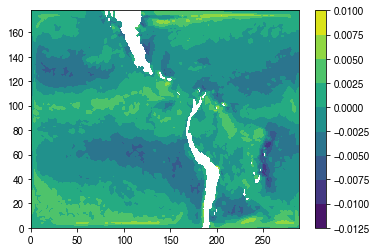

In [68]:
cf=mp.contourf(uv_400_shear[100,:,:])
mp.colorbar(cf)

# 3 hourly means of shear

In [69]:
uv_400_shear.shape

(241, 179, 289)

In [56]:
shear_t00mean = numpy.nanmean(uv_400_shear[skip_time:,:,:][times_00,:,:], axis=0)
shear_t03mean = numpy.nanmean(uv_400_shear[skip_time:,:,:][times_03,:,:], axis=0)
shear_t06mean = numpy.nanmean(uv_400_shear[skip_time:,:,:][times_06,:,:], axis=0)
shear_t09mean = numpy.nanmean(uv_400_shear[skip_time:,:,:][times_09,:,:], axis=0)
shear_t12mean = numpy.nanmean(uv_400_shear[skip_time:,:,:][times_12,:,:], axis=0)
shear_t15mean = numpy.nanmean(uv_400_shear[skip_time:,:,:][times_15,:,:], axis=0)
shear_t18mean = numpy.nanmean(uv_400_shear[skip_time:,:,:][times_18,:,:], axis=0)
shear_t21mean = numpy.nanmean(uv_400_shear[skip_time:,:,:][times_21,:,:], axis=0)

uv_400_shear_array = numpy.array([shear_t00mean, shear_t03mean, shear_t06mean, shear_t09mean, shear_t12mean, shear_t15mean, shear_t18mean, shear_t21mean])


In [70]:
shear_t00mean = numpy.nanmean(uv_400_shear_sqd[skip_time:,:,:][times_00,:,:], axis=0)
shear_t03mean = numpy.nanmean(uv_400_shear_sqd[skip_time:,:,:][times_03,:,:], axis=0)
shear_t06mean = numpy.nanmean(uv_400_shear_sqd[skip_time:,:,:][times_06,:,:], axis=0)
shear_t09mean = numpy.nanmean(uv_400_shear_sqd[skip_time:,:,:][times_09,:,:], axis=0)
shear_t12mean = numpy.nanmean(uv_400_shear_sqd[skip_time:,:,:][times_12,:,:], axis=0)
shear_t15mean = numpy.nanmean(uv_400_shear_sqd[skip_time:,:,:][times_15,:,:], axis=0)
shear_t18mean = numpy.nanmean(uv_400_shear_sqd[skip_time:,:,:][times_18,:,:], axis=0)
shear_t21mean = numpy.nanmean(uv_400_shear_sqd[skip_time:,:,:][times_21,:,:], axis=0)

uv_400_shear_array_sqd = numpy.array([shear_t00mean, shear_t03mean, shear_t06mean, shear_t09mean, shear_t12mean, shear_t15mean, shear_t18mean, shear_t21mean])


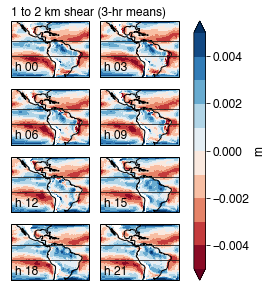

In [65]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(3.25,4))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.005,0.0051,0.001)
#levels = numpy.hstack((numpy.arange(-15,0,5), numpy.arange(0,250,25)))

xticks_deg_E=numpy.array((250,300,325))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1, projection=cartopy.crs.PlateCarree())
    ax.set_extent([xlong.min()+25., xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
    ax.coastlines(resolution='110m')
    
    #ax.axhspan(-90,-10,alpha=0.25,color='0.1')
    #ax.axhspan(10,90,alpha=0.25,color='0.1')
    
    gridlines_plot = ax.gridlines(ylocs=[-10,10], color='0.1')
    gridlines_plot.xlines = False
    
    contour_plot = ax.contourf(xlong[0,:],xlat[:,0],uv_400_shear_array[t],\
                                 cmap='RdBu', extend='both', levels=levels)#,\
                                 #vmin=0, \
                                 #vmax=1750)#,\
                                 #vmin=0,\
                                 #vmax=)

    #ax.contour(xlong[0,:],xlat[:,0],pblh_diffs_2d_array[t],levels=[0])
    
    ax.tick_params(labelsize=fontsize)
    
    #ax.text(s='hour '+hour_strings[t], x=0, y=1.02,\
    #        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.text(s='h '+hour_strings[t], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

# ('+string.ascii_lowercase[t]+') 
fig.tight_layout(w_pad=-2.5, h_pad=0.5)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1-0.03, bottom_pos.y0, 0.05, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('m', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(0,1751,250))

ax_list[0].text(s='1 to 2 km shear (3-hr means)', x=0, y=1.04, transform=ax_list[0].transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.savefig('shear_1to2km_climatology_map.png', dpi=600, bbox_inches='tight', transparent=True)

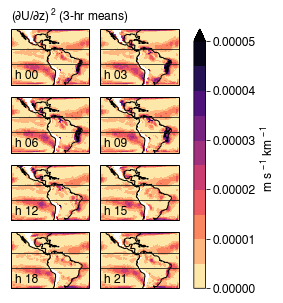

In [88]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(3.25,4))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(0,0.000051,0.000005)
#levels = numpy.hstack((numpy.arange(-15,0,5), numpy.arange(0,250,25)))

xticks_deg_E=numpy.array((250,300,325))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1, projection=cartopy.crs.PlateCarree())
    ax.set_extent([xlong.min()+25., xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
    ax.coastlines(resolution='110m')
    
    #ax.axhspan(-90,-10,alpha=0.25,color='0.1')
    #ax.axhspan(10,90,alpha=0.25,color='0.1')
    
    gridlines_plot = ax.gridlines(ylocs=[-10,10], color='0.1')
    gridlines_plot.xlines = False
    
    contour_plot = ax.contourf(xlong[0,:],xlat[:,0],uv_400_shear_array_sqd[t],\
                                 cmap='magma_r', extend='max', levels=levels)#,\
                                 #vmin=0, \
                                 #vmax=1750)#,\
                                 #vmin=0,\
                                 #vmax=)

    #ax.contour(xlong[0,:],xlat[:,0],pblh_diffs_2d_array[t],levels=[0])
    
    ax.tick_params(labelsize=fontsize)
    
    #ax.text(s='hour '+hour_strings[t], x=0, y=1.02,\
    #        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.text(s='h '+hour_strings[t], x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax_list.append(ax)

# ('+string.ascii_lowercase[t]+') 
fig.tight_layout(w_pad=-2.5, h_pad=0.5)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1-0.03, bottom_pos.y0, 0.05, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('m s$^{\,-1}$ km$^{\,-1}$', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(0,1751,250))

ax_list[0].text(s='$(\partial U / \partial z)$$^{\,2}$ (3-hr means)', x=0, y=1.04, transform=ax_list[0].transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.savefig('shear_sqd_1to2km_climatology_map.png', dpi=600, bbox_inches='tight', transparent=True)